In [52]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

230


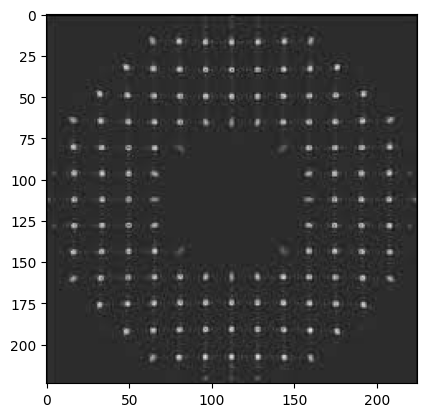

In [53]:
img_shifts=cv2.imread("example_shifts_image.jpg")
plt.imshow(img_shifts)
img_shifts[0,...]=0
img_gray=np.zeros_like(img_shifts)
print(np.max(img_shifts))

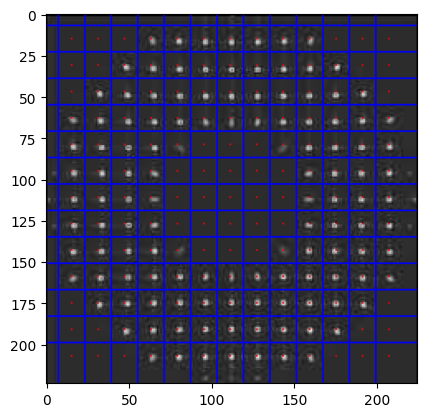

In [54]:

img_dots=np.copy(img_shifts)
for i in range(13):
    img_dots[7+16*i:8+16*i,:]=[0,0,255]
    img_dots[:,7+16*i:8+16*i]=[0,0,255]
    for j in range(13):
        img_dots[15+16*i:16+16*i,15+16*j:16+16*j,...]=[255,0,0]
plt.imshow(img_dots)

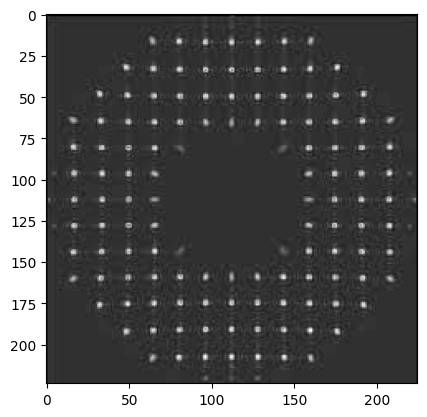

In [55]:
img_gray=img_shifts[...,0]
plt.imshow(img_gray,cmap="gray")

(224, 225)


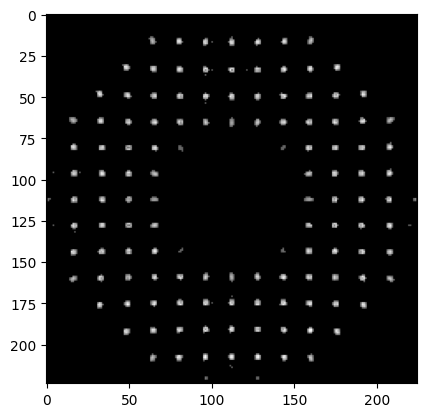

In [56]:
def cut2zero(img,ind):
    img[ind]=0
    return img
ind=img_gray<80
img_gray=cut2zero(img_gray,ind)
plt.imshow(img_gray,cmap="gray")
print(img_gray.shape)

In [57]:
def moment(grid):
    size=grid.shape[0]
    center=size/2-0.5
    x, y = np.ogrid[0:size, 0:size]

    x=x-center
    y=y-center
    x=x.repeat(size,1)
    y=y.repeat(size,0)
    y*=-1
    
    output=np.zeros((1,2))
    output[...,0]=np.sum(grid*x)/np.sum(grid)/np.max(x)
    output[...,1]=np.sum(grid*y)/np.sum(grid)/np.max(y)

    return output

test=np.array([[1,0,1],[0,1,0],[1,0,1]])
print(moment(test))

[[0. 0.]]


In [58]:


def shifts(img,grid_size=16,pad_top=8,pad_left=8):
    H,W=img.shape

    N_long=(H-pad_top)//grid_size
    N_lat=(W-pad_left)//grid_size

    shifts=np.full((N_long,N_lat,2), np.nan)

    for i in range(N_long):
        for j in range(N_lat):
            shifts[i,j]=moment(img[pad_top+grid_size*i:pad_top+grid_size-1+grid_size*i,
                                   pad_left+grid_size*j:pad_left+grid_size-1+grid_size*j])
    return shifts

shifts=shifts(img_gray)
np.save("shifts_array.npy", shifts)
print(shifts)

    

[[[        nan         nan]
  [        nan         nan]
  [        nan         nan]
  [ 0.17075009 -0.13350923]
  [ 0.22634318 -0.15619732]
  [ 0.28490925 -0.16386124]
  [ 0.28663807 -0.12081821]
  [ 0.29386667 -0.09660952]
  [ 0.22693208 -0.11412959]
  [ 0.17723332 -0.08096495]
  [        nan         nan]
  [        nan         nan]
  [        nan         nan]]

 [[        nan         nan]
  [        nan         nan]
  [ 0.19726615 -0.15840257]
  [ 0.32676208 -0.2226573 ]
  [ 0.37400282 -0.19950392]
  [ 0.41184852 -0.17540307]
  [ 0.41337018 -0.10917257]
  [ 0.40833649 -0.03114816]
  [ 0.37362637 -0.05173058]
  [ 0.32904787 -0.04605611]
  [ 0.19730762 -0.09202331]
  [        nan         nan]
  [        nan         nan]]

 [[        nan         nan]
  [ 0.20344419 -0.14209022]
  [ 0.32524405 -0.25883404]
  [ 0.36443299 -0.25787923]
  [ 0.39500904 -0.22104882]
  [ 0.43853159 -0.1723819 ]
  [ 0.43936354 -0.12009685]
  [ 0.43857782 -0.07167696]
  [ 0.39392576 -0.01694788]
  [ 0.37282402  

C:\Users\abbbb\AppData\Local\Temp\ipykernel_23180\939791595.py:13: RuntimeWarning: invalid value encountered in scalar divide
  output[...,0]=np.sum(grid*x)/np.sum(grid)/np.max(x)
C:\Users\abbbb\AppData\Local\Temp\ipykernel_23180\939791595.py:14: RuntimeWarning: invalid value encountered in scalar divide
  output[...,1]=np.sum(grid*y)/np.sum(grid)/np.max(y)
